In [1]:
%matplotlib inline

import os
import json
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

from gaminet import GAMINet
from gaminet.utils import local_visualize
from gaminet.utils import global_visualize_density
from gaminet.utils import global_visualize_wo_density
from gaminet.utils import feature_importance_visualize
from gaminet.utils import plot_regularization
from gaminet.utils import plot_trajectory

In [2]:
def metric_wrapper(metric, scaler):
    def wrapper(label, pred):
        return metric(label, pred, scaler=scaler)
    return wrapper

def rmse(label, pred, scaler):
    pred = scaler.inverse_transform(pred.reshape([-1, 1]))
    label = scaler.inverse_transform(label.reshape([-1, 1]))
    return np.sqrt(np.mean((pred - label)**2))

def load_ch():
    
    from sklearn.datasets import fetch_california_housing
    cal_housing = fetch_california_housing()
    x, y = cal_housing.data, cal_housing.target.reshape(-1, 1)

    task_type = "Regression"
    meta_info = {cal_housing.feature_names[i]:{'type':'continuous'} for i in range(x.shape[1])}
    meta_info.update({'Y':{'type':'target'}})         
    return x, y, task_type, meta_info

def load_regression_data(name):
    func_dict = {'ch':load_ch}
    def wrapper(random_state):
        function_name_ = func_dict[name]
        x, y, task_type, meta_info = function_name_()
        xx = np.zeros((x.shape[0], x.shape[1]), dtype=np.float32)
        for i, (key, item) in enumerate(meta_info.items()):
            if item['type'] == 'target':
                sy = MinMaxScaler((0, 1))
                y = sy.fit_transform(y)
                meta_info[key]['scaler'] = sy
            else:
                sx = MinMaxScaler((0, 1))
                xx[:,[i]] = sx.fit_transform(x[:,[i]])
                meta_info[key]['scaler'] = sx
        train_x, test_x, train_y, test_y = train_test_split(xx.astype(np.float32), y,
                                                            test_size=0.2, random_state=random_state)
        return train_x, test_x, train_y, test_y, task_type, meta_info, metric_wrapper(rmse, sy)
    return wrapper

In [3]:
random_state = 0
data_loader = load_regression_data("ch")
train_x, test_x, train_y, test_y, task_type, meta_info, get_metric = data_loader(random_state)

In [4]:
meta_info.keys()

dict_keys(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'Y'])

####################GAMI-Net training start.####################
##########Stage 1: main effect training start.##########
Main effects training epoch: 1, train loss: 0.11681, val loss: 0.12005
Main effects training epoch: 2, train loss: 0.05569, val loss: 0.05633
Main effects training epoch: 3, train loss: 0.05151, val loss: 0.05159
Main effects training epoch: 4, train loss: 0.04892, val loss: 0.04907
Main effects training epoch: 5, train loss: 0.04444, val loss: 0.04463
Main effects training epoch: 6, train loss: 0.03753, val loss: 0.03780
Main effects training epoch: 7, train loss: 0.03046, val loss: 0.03091
Main effects training epoch: 8, train loss: 0.02774, val loss: 0.02827
Main effects training epoch: 9, train loss: 0.02724, val loss: 0.02780
Main effects training epoch: 10, train loss: 0.02698, val loss: 0.02756
Main effects training epoch: 11, train loss: 0.02684, val loss: 0.02745
Main effects training epoch: 12, train loss: 0.02655, val loss: 0.02713
Main effects training e

Main effects training epoch: 114, train loss: 0.01601, val loss: 0.01669
Main effects training epoch: 115, train loss: 0.01641, val loss: 0.01712
Main effects training epoch: 116, train loss: 0.01601, val loss: 0.01664
Main effects training epoch: 117, train loss: 0.01600, val loss: 0.01668
Main effects training epoch: 118, train loss: 0.01594, val loss: 0.01663
Main effects training epoch: 119, train loss: 0.01580, val loss: 0.01647
Main effects training epoch: 120, train loss: 0.01597, val loss: 0.01669
Main effects training epoch: 121, train loss: 0.01580, val loss: 0.01651
Main effects training epoch: 122, train loss: 0.01567, val loss: 0.01632
Main effects training epoch: 123, train loss: 0.01595, val loss: 0.01659
Main effects training epoch: 124, train loss: 0.01569, val loss: 0.01632
Main effects training epoch: 125, train loss: 0.01569, val loss: 0.01636
Main effects training epoch: 126, train loss: 0.01580, val loss: 0.01643
Main effects training epoch: 127, train loss: 0.015

Main effects training epoch: 227, train loss: 0.01508, val loss: 0.01529
Main effects training epoch: 228, train loss: 0.01500, val loss: 0.01520
Main effects training epoch: 229, train loss: 0.01485, val loss: 0.01507
Main effects training epoch: 230, train loss: 0.01488, val loss: 0.01513
Main effects training epoch: 231, train loss: 0.01488, val loss: 0.01508
Main effects training epoch: 232, train loss: 0.01484, val loss: 0.01503
Main effects training epoch: 233, train loss: 0.01489, val loss: 0.01507
Main effects training epoch: 234, train loss: 0.01485, val loss: 0.01503
Main effects training epoch: 235, train loss: 0.01518, val loss: 0.01538
Main effects training epoch: 236, train loss: 0.01526, val loss: 0.01546
Main effects training epoch: 237, train loss: 0.01500, val loss: 0.01523
Main effects training epoch: 238, train loss: 0.01493, val loss: 0.01509
Main effects training epoch: 239, train loss: 0.01505, val loss: 0.01522
Main effects training epoch: 240, train loss: 0.014

Main effects training epoch: 340, train loss: 0.01490, val loss: 0.01509
Main effects training epoch: 341, train loss: 0.01489, val loss: 0.01496
Main effects training epoch: 342, train loss: 0.01474, val loss: 0.01488
Main effects training epoch: 343, train loss: 0.01512, val loss: 0.01528
Main effects training epoch: 344, train loss: 0.01462, val loss: 0.01474
Main effects training epoch: 345, train loss: 0.01471, val loss: 0.01479
Main effects training epoch: 346, train loss: 0.01475, val loss: 0.01483
Main effects training epoch: 347, train loss: 0.01466, val loss: 0.01481
Main effects training epoch: 348, train loss: 0.01460, val loss: 0.01472
Main effects training epoch: 349, train loss: 0.01457, val loss: 0.01471
Main effects training epoch: 350, train loss: 0.01465, val loss: 0.01479
Main effects training epoch: 351, train loss: 0.01458, val loss: 0.01473
Main effects training epoch: 352, train loss: 0.01465, val loss: 0.01478
Main effects training epoch: 353, train loss: 0.014

Main effects training epoch: 453, train loss: 0.01443, val loss: 0.01456
Main effects training epoch: 454, train loss: 0.01451, val loss: 0.01461
Main effects training epoch: 455, train loss: 0.01464, val loss: 0.01473
Main effects training epoch: 456, train loss: 0.01456, val loss: 0.01472
Main effects training epoch: 457, train loss: 0.01441, val loss: 0.01450
Main effects training epoch: 458, train loss: 0.01441, val loss: 0.01454
Main effects training epoch: 459, train loss: 0.01479, val loss: 0.01483
Main effects training epoch: 460, train loss: 0.01502, val loss: 0.01509
Main effects training epoch: 461, train loss: 0.01529, val loss: 0.01546
Main effects training epoch: 462, train loss: 0.01445, val loss: 0.01459
Main effects training epoch: 463, train loss: 0.01441, val loss: 0.01450
Main effects training epoch: 464, train loss: 0.01443, val loss: 0.01460
Main effects training epoch: 465, train loss: 0.01442, val loss: 0.01457
Main effects training epoch: 466, train loss: 0.014

Main effects training epoch: 566, train loss: 0.01432, val loss: 0.01439
Main effects training epoch: 567, train loss: 0.01426, val loss: 0.01433
Main effects training epoch: 568, train loss: 0.01427, val loss: 0.01436
Main effects training epoch: 569, train loss: 0.01507, val loss: 0.01509
Main effects training epoch: 570, train loss: 0.01421, val loss: 0.01427
Main effects training epoch: 571, train loss: 0.01442, val loss: 0.01453
Main effects training epoch: 572, train loss: 0.01425, val loss: 0.01433
Main effects training epoch: 573, train loss: 0.01423, val loss: 0.01429
Main effects training epoch: 574, train loss: 0.01431, val loss: 0.01442
Main effects training epoch: 575, train loss: 0.01442, val loss: 0.01450
Main effects training epoch: 576, train loss: 0.01425, val loss: 0.01430
Main effects training epoch: 577, train loss: 0.01422, val loss: 0.01430
Main effects training epoch: 578, train loss: 0.01426, val loss: 0.01428
Main effects training epoch: 579, train loss: 0.014

Main effects training epoch: 679, train loss: 0.01425, val loss: 0.01424
Main effects training epoch: 680, train loss: 0.01418, val loss: 0.01427
Main effects training epoch: 681, train loss: 0.01413, val loss: 0.01417
Main effects training epoch: 682, train loss: 0.01433, val loss: 0.01440
Main effects training epoch: 683, train loss: 0.01421, val loss: 0.01432
Main effects training epoch: 684, train loss: 0.01415, val loss: 0.01423
Main effects training epoch: 685, train loss: 0.01434, val loss: 0.01434
Main effects training epoch: 686, train loss: 0.01416, val loss: 0.01418
Main effects training epoch: 687, train loss: 0.01424, val loss: 0.01430
Main effects training epoch: 688, train loss: 0.01437, val loss: 0.01443
Main effects training epoch: 689, train loss: 0.01421, val loss: 0.01429
Main effects training epoch: 690, train loss: 0.01417, val loss: 0.01424
Main effects training epoch: 691, train loss: 0.01420, val loss: 0.01430
Main effects training epoch: 692, train loss: 0.014

Main effects training epoch: 792, train loss: 0.01406, val loss: 0.01414
Main effects training epoch: 793, train loss: 0.01422, val loss: 0.01430
Main effects training epoch: 794, train loss: 0.01406, val loss: 0.01407
Main effects training epoch: 795, train loss: 0.01411, val loss: 0.01416
Main effects training epoch: 796, train loss: 0.01416, val loss: 0.01420
Main effects training epoch: 797, train loss: 0.01407, val loss: 0.01412
Main effects training epoch: 798, train loss: 0.01414, val loss: 0.01420
Main effects training epoch: 799, train loss: 0.01471, val loss: 0.01475
Main effects training epoch: 800, train loss: 0.01408, val loss: 0.01412
Main effects training epoch: 801, train loss: 0.01426, val loss: 0.01429
Main effects training epoch: 802, train loss: 0.01408, val loss: 0.01417
Main effects training epoch: 803, train loss: 0.01411, val loss: 0.01420
Main effects training epoch: 804, train loss: 0.01407, val loss: 0.01418
Main effects training epoch: 805, train loss: 0.014

Interaction training epoch: 59, train loss: 0.01346, val loss: 0.01376
Interaction training epoch: 60, train loss: 0.01345, val loss: 0.01373
Interaction training epoch: 61, train loss: 0.01345, val loss: 0.01374
Interaction training epoch: 62, train loss: 0.01346, val loss: 0.01374
Interaction training epoch: 63, train loss: 0.01344, val loss: 0.01373
Interaction training epoch: 64, train loss: 0.01343, val loss: 0.01372
Interaction training epoch: 65, train loss: 0.01344, val loss: 0.01373
Interaction training epoch: 66, train loss: 0.01340, val loss: 0.01370
Interaction training epoch: 67, train loss: 0.01344, val loss: 0.01373
Interaction training epoch: 68, train loss: 0.01345, val loss: 0.01376
Interaction training epoch: 69, train loss: 0.01342, val loss: 0.01373
Interaction training epoch: 70, train loss: 0.01337, val loss: 0.01369
Interaction training epoch: 71, train loss: 0.01341, val loss: 0.01371
Interaction training epoch: 72, train loss: 0.01337, val loss: 0.01368
Intera

Interaction training epoch: 174, train loss: 0.01297, val loss: 0.01347
Interaction training epoch: 175, train loss: 0.01285, val loss: 0.01333
Interaction training epoch: 176, train loss: 0.01287, val loss: 0.01334
Interaction training epoch: 177, train loss: 0.01284, val loss: 0.01332
Interaction training epoch: 178, train loss: 0.01286, val loss: 0.01333
Interaction training epoch: 179, train loss: 0.01285, val loss: 0.01334
Interaction training epoch: 180, train loss: 0.01286, val loss: 0.01336
Interaction training epoch: 181, train loss: 0.01287, val loss: 0.01335
Interaction training epoch: 182, train loss: 0.01282, val loss: 0.01333
Interaction training epoch: 183, train loss: 0.01281, val loss: 0.01330
Interaction training epoch: 184, train loss: 0.01284, val loss: 0.01335
Interaction training epoch: 185, train loss: 0.01281, val loss: 0.01332
Interaction training epoch: 186, train loss: 0.01289, val loss: 0.01338
Interaction training epoch: 187, train loss: 0.01288, val loss: 

Interaction training epoch: 288, train loss: 0.01266, val loss: 0.01326
Interaction training epoch: 289, train loss: 0.01264, val loss: 0.01319
Interaction training epoch: 290, train loss: 0.01260, val loss: 0.01317
Interaction training epoch: 291, train loss: 0.01260, val loss: 0.01321
Interaction training epoch: 292, train loss: 0.01258, val loss: 0.01318
Interaction training epoch: 293, train loss: 0.01259, val loss: 0.01316
Interaction training epoch: 294, train loss: 0.01257, val loss: 0.01314
Interaction training epoch: 295, train loss: 0.01257, val loss: 0.01315
Interaction training epoch: 296, train loss: 0.01263, val loss: 0.01321
Interaction training epoch: 297, train loss: 0.01259, val loss: 0.01320
Interaction training epoch: 298, train loss: 0.01257, val loss: 0.01319
Interaction training epoch: 299, train loss: 0.01260, val loss: 0.01318
Interaction training epoch: 300, train loss: 0.01256, val loss: 0.01315
Interaction training epoch: 301, train loss: 0.01257, val loss: 

Interaction training epoch: 402, train loss: 0.01260, val loss: 0.01324
Interaction training epoch: 403, train loss: 0.01236, val loss: 0.01304
Interaction training epoch: 404, train loss: 0.01240, val loss: 0.01308
Interaction training epoch: 405, train loss: 0.01235, val loss: 0.01301
Interaction training epoch: 406, train loss: 0.01238, val loss: 0.01300
Interaction training epoch: 407, train loss: 0.01235, val loss: 0.01303
Interaction training epoch: 408, train loss: 0.01237, val loss: 0.01306
Interaction training epoch: 409, train loss: 0.01242, val loss: 0.01313
Interaction training epoch: 410, train loss: 0.01243, val loss: 0.01314
Interaction training epoch: 411, train loss: 0.01234, val loss: 0.01303
Interaction training epoch: 412, train loss: 0.01247, val loss: 0.01314
Interaction training epoch: 413, train loss: 0.01233, val loss: 0.01299
Interaction training epoch: 414, train loss: 0.01237, val loss: 0.01302
Interaction training epoch: 415, train loss: 0.01233, val loss: 

Interaction training epoch: 516, train loss: 0.01209, val loss: 0.01288
Interaction training epoch: 517, train loss: 0.01207, val loss: 0.01286
Interaction training epoch: 518, train loss: 0.01213, val loss: 0.01291
Interaction training epoch: 519, train loss: 0.01207, val loss: 0.01285
Interaction training epoch: 520, train loss: 0.01207, val loss: 0.01279
Interaction training epoch: 521, train loss: 0.01202, val loss: 0.01280
Interaction training epoch: 522, train loss: 0.01206, val loss: 0.01283
Interaction training epoch: 523, train loss: 0.01218, val loss: 0.01294
Interaction training epoch: 524, train loss: 0.01203, val loss: 0.01282
Interaction training epoch: 525, train loss: 0.01202, val loss: 0.01277
Interaction training epoch: 526, train loss: 0.01208, val loss: 0.01286
Interaction training epoch: 527, train loss: 0.01203, val loss: 0.01282
Interaction training epoch: 528, train loss: 0.01203, val loss: 0.01284
Interaction training epoch: 529, train loss: 0.01202, val loss: 

Interaction training epoch: 630, train loss: 0.01163, val loss: 0.01250
Interaction training epoch: 631, train loss: 0.01186, val loss: 0.01275
Interaction training epoch: 632, train loss: 0.01158, val loss: 0.01252
Interaction training epoch: 633, train loss: 0.01151, val loss: 0.01241
Interaction training epoch: 634, train loss: 0.01155, val loss: 0.01246
Interaction training epoch: 635, train loss: 0.01160, val loss: 0.01246
Interaction training epoch: 636, train loss: 0.01158, val loss: 0.01246
Interaction training epoch: 637, train loss: 0.01160, val loss: 0.01254
Interaction training epoch: 638, train loss: 0.01148, val loss: 0.01244
Interaction training epoch: 639, train loss: 0.01152, val loss: 0.01243
Interaction training epoch: 640, train loss: 0.01162, val loss: 0.01263
Interaction training epoch: 641, train loss: 0.01154, val loss: 0.01243
Interaction training epoch: 642, train loss: 0.01156, val loss: 0.01253
Interaction training epoch: 643, train loss: 0.01144, val loss: 

Interaction training epoch: 744, train loss: 0.01095, val loss: 0.01203
Interaction training epoch: 745, train loss: 0.01103, val loss: 0.01199
Interaction training epoch: 746, train loss: 0.01102, val loss: 0.01210
Interaction training epoch: 747, train loss: 0.01095, val loss: 0.01197
Interaction training epoch: 748, train loss: 0.01099, val loss: 0.01198
Interaction training epoch: 749, train loss: 0.01096, val loss: 0.01203
Interaction training epoch: 750, train loss: 0.01108, val loss: 0.01213
Interaction training epoch: 751, train loss: 0.01097, val loss: 0.01199
Interaction training epoch: 752, train loss: 0.01089, val loss: 0.01196
Interaction training epoch: 753, train loss: 0.01089, val loss: 0.01198
Interaction training epoch: 754, train loss: 0.01089, val loss: 0.01195
Interaction training epoch: 755, train loss: 0.01095, val loss: 0.01199
Interaction training epoch: 756, train loss: 0.01093, val loss: 0.01205
Interaction training epoch: 757, train loss: 0.01090, val loss: 

Interaction training epoch: 858, train loss: 0.01068, val loss: 0.01195
Interaction training epoch: 859, train loss: 0.01071, val loss: 0.01190
Interaction training epoch: 860, train loss: 0.01069, val loss: 0.01195
Interaction training epoch: 861, train loss: 0.01069, val loss: 0.01189
Interaction training epoch: 862, train loss: 0.01058, val loss: 0.01171
Interaction training epoch: 863, train loss: 0.01060, val loss: 0.01173
Interaction training epoch: 864, train loss: 0.01058, val loss: 0.01175
Interaction training epoch: 865, train loss: 0.01059, val loss: 0.01178
Interaction training epoch: 866, train loss: 0.01067, val loss: 0.01181
Interaction training epoch: 867, train loss: 0.01062, val loss: 0.01184
Interaction training epoch: 868, train loss: 0.01069, val loss: 0.01190
Interaction training epoch: 869, train loss: 0.01074, val loss: 0.01191
Interaction training epoch: 870, train loss: 0.01061, val loss: 0.01173
Interaction training epoch: 871, train loss: 0.01064, val loss: 

Interaction training epoch: 972, train loss: 0.01045, val loss: 0.01174
Interaction training epoch: 973, train loss: 0.01039, val loss: 0.01168
Interaction training epoch: 974, train loss: 0.01039, val loss: 0.01168
Interaction training epoch: 975, train loss: 0.01039, val loss: 0.01170
Interaction training epoch: 976, train loss: 0.01053, val loss: 0.01184
Interaction training epoch: 977, train loss: 0.01046, val loss: 0.01170
Interaction training epoch: 978, train loss: 0.01042, val loss: 0.01170
Interaction training epoch: 979, train loss: 0.01045, val loss: 0.01174
Interaction training epoch: 980, train loss: 0.01055, val loss: 0.01179
Interaction training epoch: 981, train loss: 0.01035, val loss: 0.01167
Interaction training epoch: 982, train loss: 0.01042, val loss: 0.01169
Interaction training epoch: 983, train loss: 0.01038, val loss: 0.01163
Interaction training epoch: 984, train loss: 0.01033, val loss: 0.01166
Interaction training epoch: 985, train loss: 0.01044, val loss: 

Fine tuning epoch: 72, train loss: 0.01063, val loss: 0.01194
Fine tuning epoch: 73, train loss: 0.01001, val loss: 0.01122
Fine tuning epoch: 74, train loss: 0.01091, val loss: 0.01216
Fine tuning epoch: 75, train loss: 0.01024, val loss: 0.01152
Fine tuning epoch: 76, train loss: 0.01007, val loss: 0.01124
Fine tuning epoch: 77, train loss: 0.01009, val loss: 0.01136
Fine tuning epoch: 78, train loss: 0.01037, val loss: 0.01175
Fine tuning epoch: 79, train loss: 0.01002, val loss: 0.01125
Fine tuning epoch: 80, train loss: 0.01062, val loss: 0.01188
Fine tuning epoch: 81, train loss: 0.00998, val loss: 0.01127
Fine tuning epoch: 82, train loss: 0.01012, val loss: 0.01141
Fine tuning epoch: 83, train loss: 0.01039, val loss: 0.01161
Fine tuning epoch: 84, train loss: 0.01020, val loss: 0.01139
Fine tuning epoch: 85, train loss: 0.01021, val loss: 0.01139
Fine tuning epoch: 86, train loss: 0.01011, val loss: 0.01143
Fine tuning epoch: 87, train loss: 0.01005, val loss: 0.01125
Fine tun

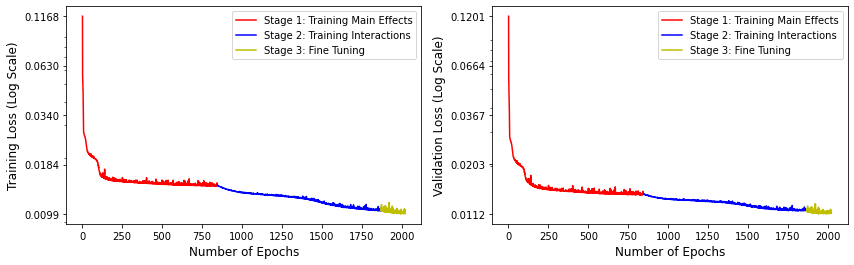

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


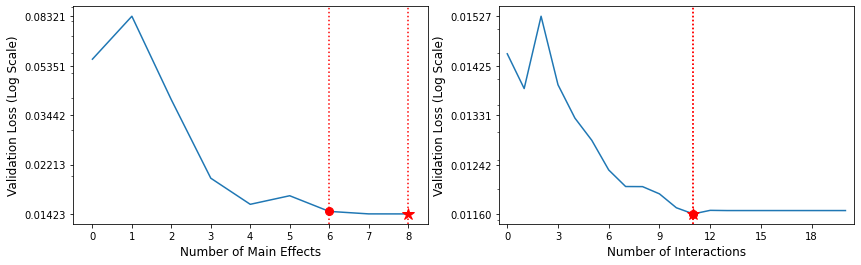

In [5]:
folder = "./results/"
if not os.path.exists(folder):
    os.makedirs(folder)

model = GAMINet(meta_info=meta_info, interact_num=20,
            interact_arch=[40] * 5, subnet_arch=[40] * 5, 
            batch_size=200, task_type=task_type, activation_func=tf.nn.relu, 
            main_effect_epochs=5000, interaction_epochs=5000, tuning_epochs=500, 
            lr_bp=[0.0001, 0.0001, 0.0001], early_stop_thres=[50, 50, 50],
            heredity=True, loss_threshold=0.01, reg_clarity=0.1,
            verbose=True, val_ratio=0.2, random_state=0)
model.fit(train_x, train_y)
data_dict_logs = model.summary_logs(save_dict=False)
plot_trajectory(data_dict_logs, folder=folder, name="ch_traj", save_png=True, save_eps=True)
plot_regularization(data_dict_logs, folder=folder, name="ch_regu", save_png=True, save_eps=True)

In [6]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)
gaminet_stat = np.hstack([np.round(get_metric(train_y, pred_train),5),
                      np.round(get_metric(test_y, pred_test),5)])
print(gaminet_stat)

[0.4999  0.51843]


Global Interpretation

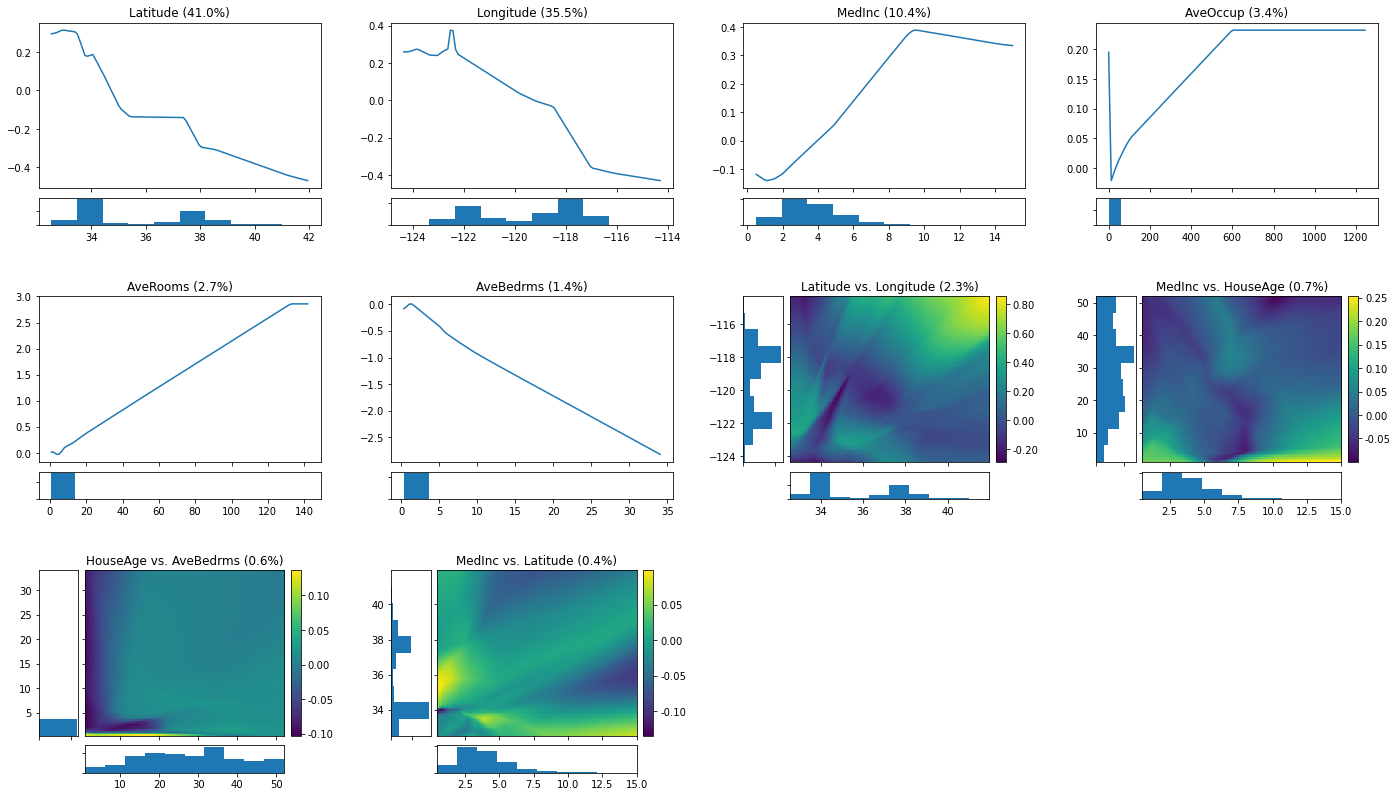

In [8]:
data_dict_global = model.global_explain(save_dict=True, folder=folder, name="ch_global")
global_visualize_density(data_dict_global, folder=folder, name="ch_global",
                         main_effect_num=8, interaction_num=4, cols_per_row=4, save_png=True, save_eps=True)

Feature Importance

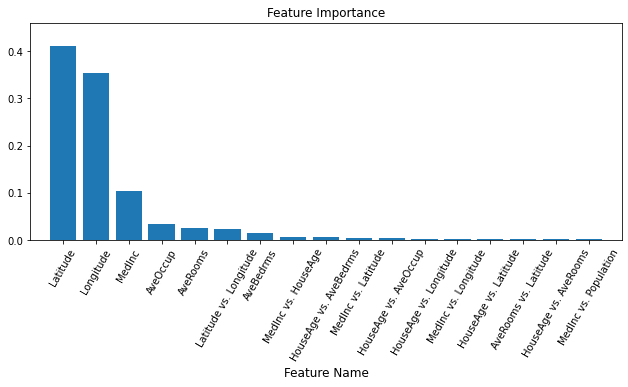

In [9]:
feature_importance_visualize(data_dict_global)

Interpret the prediction of a test sample

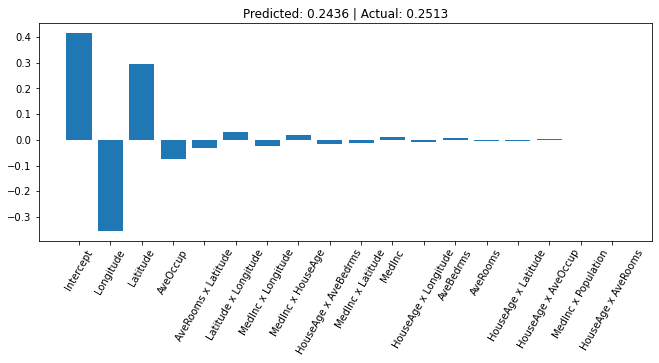

In [10]:
data_dict_local = model.local_explain(test_x[[0]], test_y[[0]], save_dict=False)
local_visualize(data_dict_local[0], save_png=False)